<h1> Data Preprocessing</h1>

## Library Imports

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

## Data Imports

In [2]:
data = pd.read_csv('Conversation.csv')

## EDA (Exploratory Data Analysis)

In [3]:
data.shape

(3725, 3)

In [4]:
data.head()

,Unnamed: 0,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3725 non-null   int64 
 1   question    3725 non-null   object
 2   answer      3725 non-null   object
dtypes: int64(1), object(2)
memory usage: 87.4+ KB


In [6]:
data.describe()

,Unnamed: 0
count,3725.000000
mean,1862.000000
std,1075.459204
min,0.000000
25%,931.000000
50%,1862.000000
75%,2793.000000
max,3724.000000


In [7]:
data['question'].nunique()

3510

In [8]:
data['answer'].nunique()

3512

## Handling Missing Value

In [9]:
data.isna().sum()

Unnamed: 0    0
question      0
answer        0
dtype: int64

In [10]:
data = data.drop(columns=['Unnamed: 0'])

## Feature Engineering

In [11]:
questions = data['question']
answers = data['answer']

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(questions) 

## Handling Outlier

In [13]:
question_lengths = questions.apply(len)

## Data Visualization

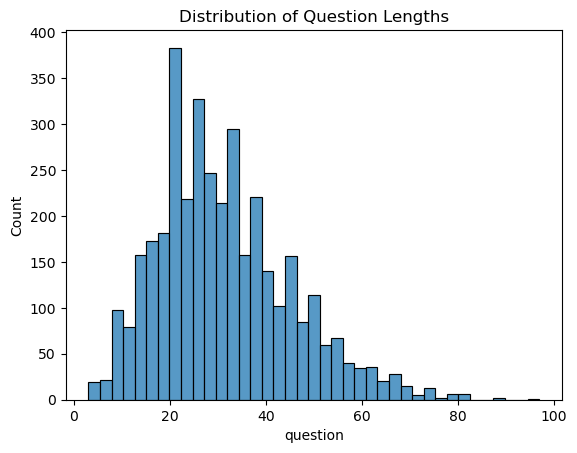

In [14]:
sns.histplot(question_lengths)
plt.title("Distribution of Question Lengths")
plt.show()

# Model Building

## Train Test Split 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, answers, test_size=0.3, random_state=42)

## Model Initalization

In [17]:
model = MultinomialNB()

## Model Training

In [18]:
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred = model.predict(X_test)

## Hyper Parameter Tuining

# Evaluation and Result

In [22]:
accuracy = accuracy_score(y_test, y_pred)

In [23]:
accuracy

0.005366726296958855

In [25]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
                                                                                     precision    recall  f1-score   support

                                it doesn't matter. here he comes now with the mop.       0.00      0.00      0.00         1
                                                                 "deal or no deal"       0.00      0.00      0.00         1
                                              "Â…and you know you should be glad!"       0.00      0.00      0.00         1
                                      a blind date doesn't mean that she is blind!       0.00      0.00      0.00         1
                              a coffin costs too much and takes up too much space.       0.00      0.00      0.00         1
                                      a couple of dictionaries and some textbooks.       0.00      0.00      0.00         1
                                                      a family with only one baby.       0.00      0.00   

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Error

# Research